In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier as KNN

In [116]:
#import the dataset

df = pd.read_csv('assignment1/data_seed.dat',header=None,delimiter='\t')
print(df.shape)

(210, 8)


In [117]:
#Breaking up the data into train and test data
labels = df.iloc[:,[7]]
data = df.iloc[:,:-1]

#Training Split I have done before
#xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(data,labels,test_size=0.2,random_state=1)
#Doing the same kind of split using the 5-fold corss validation method
Kfolds = sklearn.model_selection.KFold(n_splits=5,random_state=1,shuffle=True)




In [118]:
Klist = [1,5,10,15]
Elist = []
for i in Klist:
    K_error = np.zeros(5)
    for j, (train_index,test_index) in enumerate(Kfolds.split(data,labels)):
        #pulls the data into test and train data
        train_set_x = data.iloc[train_index]
        test_set_x = data.iloc[test_index]
        train_set_y = labels.iloc[train_index]
        test_set_y = labels.iloc[test_index]
        y_true = np.asarray(test_set_y).flatten()
        #Fit the model
        model = KNN(n_neighbors=i)
        model.fit(train_set_x,train_set_y)
        y_pred = model.predict(test_set_x)
    
        acc = sk.metrics.accuracy_score(y_pred,y_true)
        error = 1-acc
        
        K_error[j] = error
    print(i)
    print(K_error)
    Elist.append(K_error.mean())

1
[0.0952381  0.07142857 0.04761905 0.11904762 0.11904762]
5
[0.14285714 0.07142857 0.04761905 0.16666667 0.14285714]
10
[0.0952381  0.07142857 0.02380952 0.11904762 0.11904762]
15
[0.0952381  0.07142857 0.0952381  0.0952381  0.14285714]


C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Eric_Larsen\Desktop\Spring 2023 Machine Learning Stats\venv\lib\

[0.09047619047619049, 0.1142857142857143, 0.08571428571428572, 0.1]


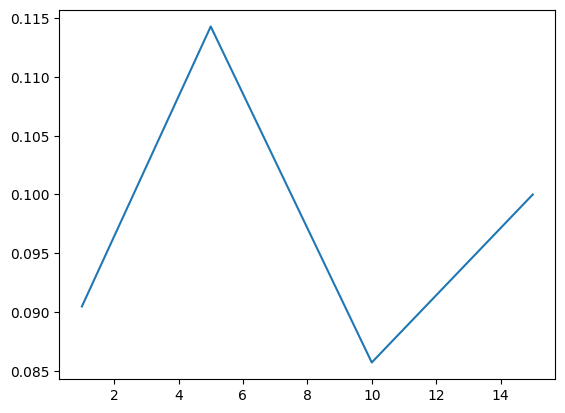

In [119]:
#Plot results
print(Elist)
error_plot =plt.figure()

plt.plot(Klist,Elist)